## LSB Demodulator

In [216]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Parameters
carrier_freq = 100000  # Carrier frequency in Hz
modulation_freq = 440  # Modulating signal frequency in Hz
duration = 5  # Duration of the signal in seconds
sampling_rate = 6000  # Sampling rate in Hz

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Modulated signal
carrier = np.cos(2 * np.pi * carrier_freq * t)
modulating_signal = np.sin(2 * np.pi * modulation_freq * t)
modulated_signal = carrier * modulating_signal

noise = 10*np.random.normal(0,1,modulated_signal.shape[0])

channel_out = awgn(modulated_signal,50)

# Demodulation
demodulated_signal = channel_out * (2 * carrier)

# Apply low-pass filter to recover the modulating signal
cutoff_freq = modulation_freq*1.5  # Cutoff frequency of the low-pass filter
b, a = scipy.signal.butter(6, cutoff_freq / (0.5 * sampling_rate), btype='low')
recovered_signal = scipy.signal.lfilter(b, a, demodulated_signal)

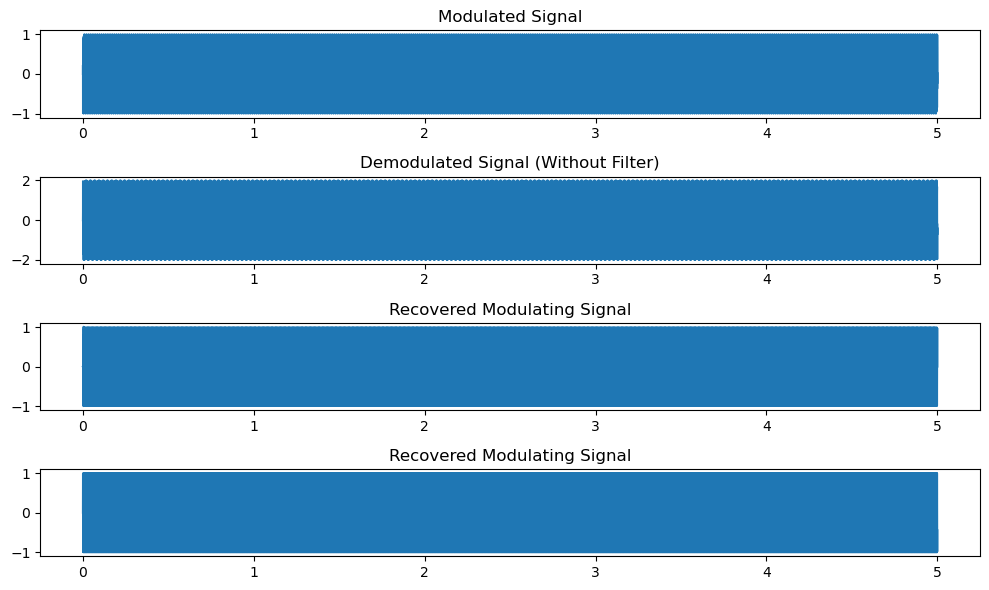

In [133]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(t, modulated_signal)
plt.title('Modulated Signal')

plt.subplot(4, 1, 2)
plt.plot(t, demodulated_signal)
plt.title('Demodulated Signal (Without Filter)')

plt.subplot(4, 1, 3)
plt.plot(t, recovered_signal)
plt.title('Recovered Modulating Signal')

plt.subplot(4, 1, 4)
plt.plot(t, modulating_signal)
plt.title('Recovered Modulating Signal')

plt.tight_layout()
plt.show()

In [136]:
def lsb_demodulator(cutoff_freq, sampling_rate, modulated_signal, carrier_freq, duration):
    
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    carrier = np.cos(2 * np.pi * carrier_freq * t)
    demodulated_signal = modulated_signal * (2 * carrier)
    
    b, a = scipy.signal.butter(6, cutoff_freq / (0.5 * sampling_rate), btype='low')
    recovered_signal = scipy.signal.lfilter(b, a, demodulated_signal)
    return recovered_signal

In [195]:
def awgn(signal, desired_snr):
    """
    Add AWGN to the input signal to achieve the desired SNR level.
    """
    signal_power = np.mean(signal**2)
    
    # Calculate the noise power based on the desired SNR and signal power
    noise_power = signal_power / (10**(desired_snr / 10))
    
    # Generate the noise with the calculated power
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    
    # Add the noise to the original signal
    noisy_signal = signal + noise
    
    return noisy_signal

In [205]:
result = lsb_demodulator(cutoff_freq,sampling_rate,modulated_signal,carrier_freq,duration)

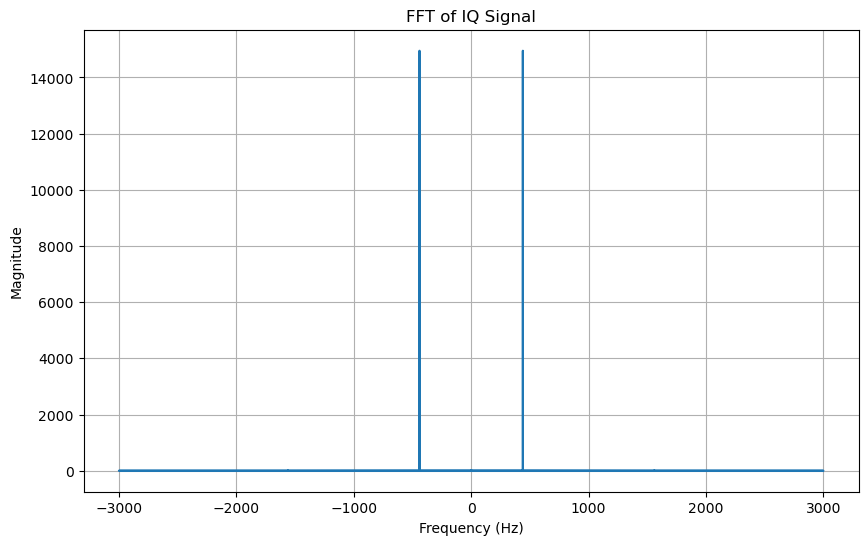

In [206]:
# Perform FFT
sampling_rate = 6000  # Hz
num_samples = int(sampling_rate * duration)
fft_result = np.fft.fft(result)
freq_axis = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_axis, np.abs(fft_result))
plt.title("FFT of IQ Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [207]:
import numpy as np
from IPython.display import Audio

# Play the audio
Audio(data=result, rate=6000)

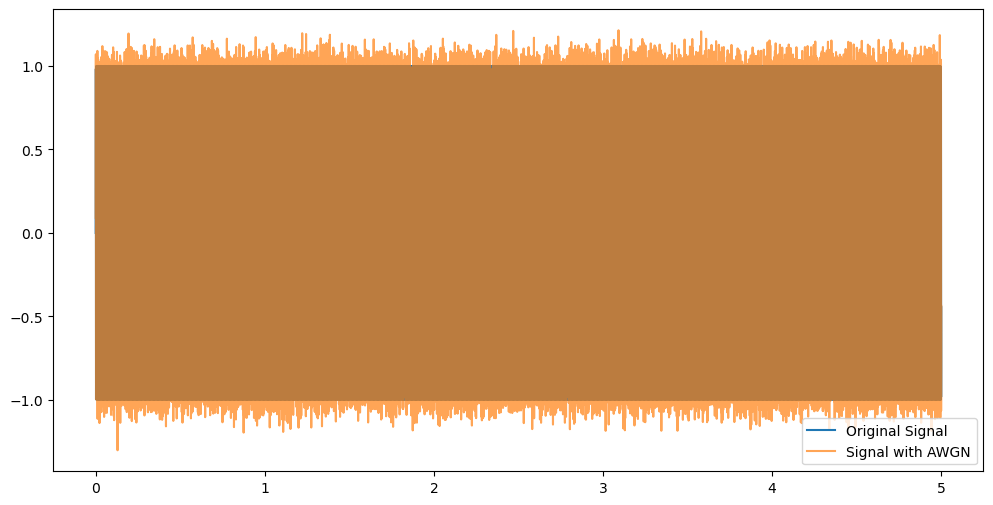

In [219]:
# Add AWGN to the signal
noisy_signal = awgn(modulating_signal, desired_snr=20)

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))
plt.plot(t, modulating_signal, label='Original Signal')
plt.plot(t, noisy_signal, label='Signal with AWGN', alpha=0.7)
plt.legend()
plt.show()